<a href="https://colab.research.google.com/github/GudepuSandeepReddy/pythonds/blob/main/a2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, MinMaxScaler, normalize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 1: Load the dataset and display summary statistics
iris = load_iris()
data = iris.data
columns = iris.feature_names
df = pd.DataFrame(data, columns=columns)
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


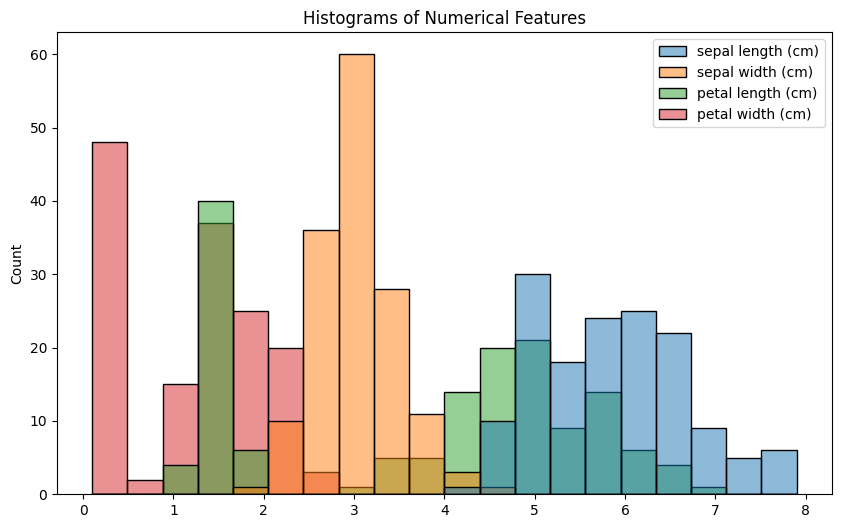

In [14]:
# Step 2: Visualize the distributions of numerical features using histograms
plt.figure(figsize=(10, 6))
sns.histplot(data=df, bins=20, kde=True)
plt.title("Histograms of Numerical Features")
plt.show()


In [7]:
# Step 3: Implement and compare scaling techniques
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

data_standard = scaler_standard.fit_transform(data)
data_minmax = scaler_minmax.fit_transform(data)

In [17]:
# Step 5: Normalize the dataset using L2 normalization and display normalized data
data_normalized = normalize(data, norm='l2')
df_normalized = pd.DataFrame(data_normalized, columns=columns)
print(df_normalized.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.803773          0.551609           0.220644          0.031521
1           0.828133          0.507020           0.236609          0.033801
2           0.805333          0.548312           0.222752          0.034269
3           0.800030          0.539151           0.260879          0.034784
4           0.790965          0.569495           0.221470          0.031639


In [9]:
# Step 6: Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(data, iris.target, test_size=0.2, random_state=42)

# Apply scaling techniques to both subsets
X_train_scaled_standard = scaler_standard.fit_transform(X_train)
X_test_scaled_standard = scaler_standard.transform(X_test)

X_train_scaled_minmax = scaler_minmax.fit_transform(X_train)
X_test_scaled_minmax = scaler_minmax.transform(X_test)

In [10]:
# Step 7: Train a simple Linear Regression model and compare performance
model_scaled_standard = LinearRegression()
model_scaled_minmax = LinearRegression()

model_scaled_standard.fit(X_train_scaled_standard, y_train)
model_scaled_minmax.fit(X_train_scaled_minmax, y_train)

y_pred_scaled_standard = model_scaled_standard.predict(X_test_scaled_standard)
y_pred_scaled_minmax = model_scaled_minmax.predict(X_test_scaled_minmax)

mse_scaled_standard = mean_squared_error(y_test, y_pred_scaled_standard)
mse_scaled_minmax = mean_squared_error(y_test, y_pred_scaled_minmax)

print("MSE with StandardScaler:", mse_scaled_standard)
print("MSE with Min-Max Scaler:", mse_scaled_minmax)

MSE with StandardScaler: 0.037113794407976894
MSE with Min-Max Scaler: 0.0371137944079769
